In [1]:
#Importing the basic librarires
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Importing the dataset
data = pd.read_csv(r"/content/drive/MyDrive/uber.csv")
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


**Data Preprocessing**

In [4]:
# Reframing the columns
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [5]:
# Reframing the columns
data['date'] = data['pickup_datetime'].apply(lambda d: d.day)
data['month'] = data['pickup_datetime'].apply(lambda d: d.month)
data['year'] = data['pickup_datetime'].apply(lambda d: d.year)
data['day'] = data['pickup_datetime'].apply(lambda d: d.weekday)
data['hour'] = data['pickup_datetime'].apply(lambda d: d.hour)

In [6]:
#Dropping columns that are not useful
data.drop(['key','pickup_datetime'], axis=1, inplace=True)

In [7]:
#Dropping Null Values
data.dropna(how='any',inplace=True)

In [8]:
#Range of valid Latitude and longitude
min_lat = -90
max_lat = 90
min_long = -180
max_long = 180

In [9]:
#Dropping that are not a valid latitude or longitude
data.drop(data[(data['pickup_longitude'] < min_long) | (data['pickup_longitude'] > max_long)].index, inplace=True)
data.drop(data[(data['dropoff_longitude'] < min_long) | (data['dropoff_longitude'] > max_long)].index, inplace=True)
data.drop(data[(data['pickup_latitude'] < min_lat) | (data['pickup_latitude'] > max_lat)].index, inplace=True)
data.drop(data[(data['dropoff_latitude'] < min_lat) | (data['dropoff_latitude'] > max_lat)].index, inplace=True)

In [10]:
#Dropping fare amount <=0 and passenger count =>6
data.drop(data[data['fare_amount']<=0].index,inplace=True)
data.drop(data[data['passenger_count']==0].index,inplace=True)
data.drop(data[data['passenger_count']>6].index,inplace=True)

In [11]:
#Checking the stats of all the columns
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,year,day,hour
count,1.992560e+05,199256.000000,199256.000000,199256.000000,199256.000000,199256.000000,199256.000000,199256.000000,199256.000000,199256.000000,199256.000000,199256.000000
mean,2.771597e+07,11.369376,-72.504173,39.919172,-72.514408,39.923484,1.689440,15.705650,6.283464,2011.743712,3.049369,13.492793
std,1.601417e+07,9.905986,10.442243,6.127757,10.403044,6.114307,1.305386,8.686947,3.438457,1.859075,1.946786,6.516099
min,1.000000e+00,0.010000,-93.824668,-74.015515,-75.458979,-74.015750,1.000000,1.000000,1.000000,2009.000000,0.000000,0.000000
25%,1.382668e+07,6.000000,-73.992063,40.734794,-73.991409,40.733828,1.000000,8.000000,3.000000,2010.000000,1.000000,9.000000
50%,2.775602e+07,8.500000,-73.981825,40.752582,-73.980094,40.753041,1.000000,16.000000,6.000000,2012.000000,3.000000,14.000000
75%,4.156047e+07,12.500000,-73.967162,40.767155,-73.963663,40.767995,2.000000,23.000000,9.000000,2013.000000,5.000000,19.000000
max,5.542357e+07,499.000000,40.808425,48.018760,40.831932,45.031598,6.000000,31.000000,12.000000,2015.000000,6.000000,23.000000


In [12]:
#Checking the dtypes of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199256 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199256 non-null  int64  
 1   fare_amount        199256 non-null  float64
 2   pickup_longitude   199256 non-null  float64
 3   pickup_latitude    199256 non-null  float64
 4   dropoff_longitude  199256 non-null  float64
 5   dropoff_latitude   199256 non-null  float64
 6   passenger_count    199256 non-null  int64  
 7   date               199256 non-null  int64  
 8   month              199256 non-null  int64  
 9   year               199256 non-null  int64  
 10  day                199256 non-null  int64  
 11  hour               199256 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 19.8 MB


 **Exploratory Data Analysis (EDA)**



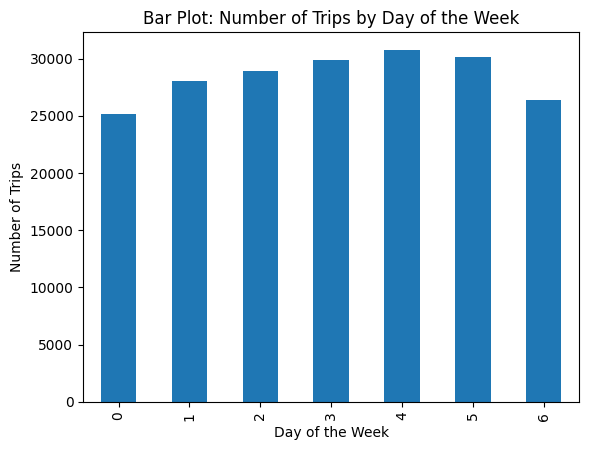

In [13]:
#Plotting a bar plot
trips_by_day = data['day'].value_counts().sort_index()
trips_by_day.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Bar Plot: Number of Trips by Day of the Week')
plt.show()

In [14]:
data.head()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,year,day,hour
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,7,5,2015,3,19
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,7,2009,4,20
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,24,8,2009,0,21
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,6,2009,4,8
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,28,8,2014,3,17


<Axes: xlabel='passenger_count', ylabel='fare_amount'>

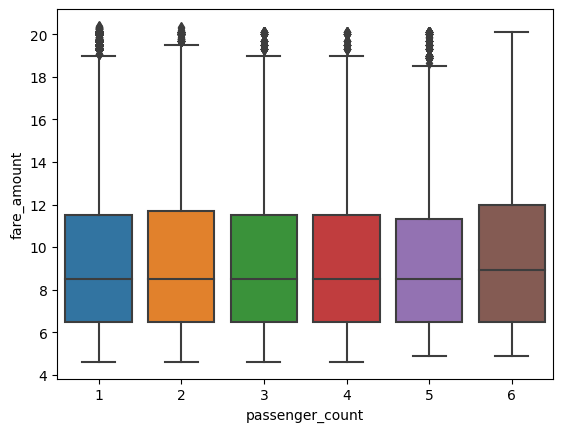

In [15]:
#Plotting a boxplot
percentiles = data['fare_amount'].quantile([0.1, 0.9]).values
data=data[(data['fare_amount'] > percentiles[0]) & (data['fare_amount'] < percentiles[1])]
sns.boxplot(data=data, x='passenger_count', y='fare_amount')

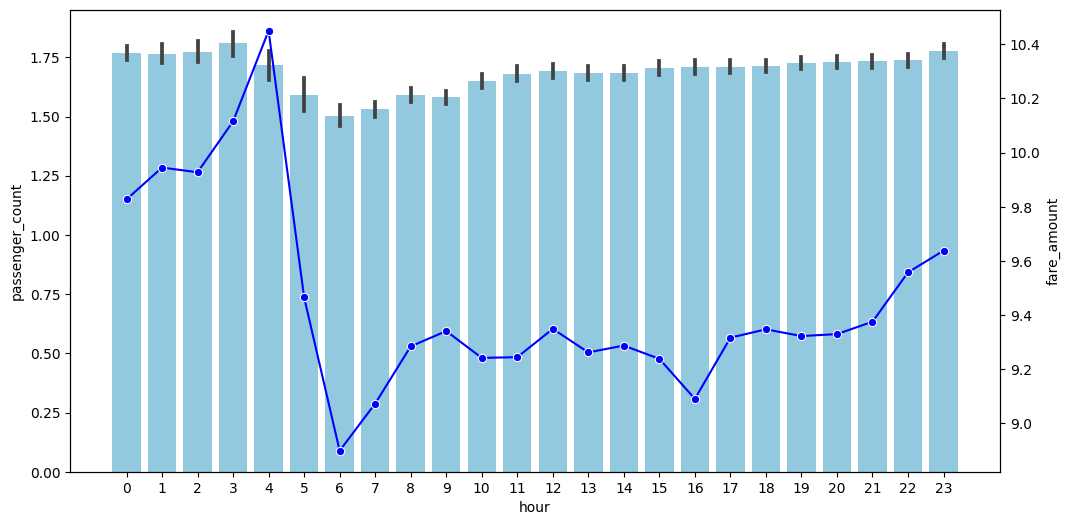

In [16]:
#Plotting
fig, ax1=plt.subplots(figsize=(12,6))
sns.color_palette("pastel")
sns.barplot(data=data,x='hour', y='passenger_count', color='skyblue', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data=data,x='hour', y='fare_amount', errorbar=None, color='blue', marker='o', ax=ax2)
plt.show()

**Regression Modeling**

In [17]:
#Splitting the data intro training & testing sets
x = data.drop('fare_amount',axis=1)
y = data['fare_amount']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 42)

In [18]:

print('Original set  ---> ',x.shape,y.shape,'\nTraining set  ---> ',x_train.shape,y_train.shape,'\nTesting set   ---> ', x_test.shape,'', y_test.shape)

Original set  --->  (157708, 11) (157708,) 
Training set  --->  (126166, 11) (126166,) 
Testing set   --->  (31542, 11)  (31542,)


In [19]:
#Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

Train_X_std = std.fit_transform(x_train)
Train_X_std = pd.DataFrame(Train_X_std, columns=x.columns)
display(Train_X_std.describe())

Test_X_std = std.transform(x_test)
Test_X_std = pd.DataFrame(Test_X_std, columns=x.columns)
display(Test_X_std.describe())

,Unnamed: 0,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,year,day,hour
count,1.261660e+05,1.261660e+05,1.261660e+05,1.261660e+05,1.261660e+05,1.261660e+05,1.261660e+05,1.261660e+05,1.261660e+05,1.261660e+05,1.261660e+05
mean,-1.864129e-17,1.369149e-15,-1.522841e-16,-8.256231e-17,-8.328318e-16,-4.550501e-17,5.257293e-17,-7.738105e-17,3.940005e-14,-8.081645e-18,-6.898965e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.730391e+00,-1.681391e+00,-1.884944e+01,-2.746779e-01,-1.893192e+01,-5.302068e-01,-1.695005e+00,-1.532678e+00,-1.475639e+00,-1.574104e+00,-2.090166e+00
25%,-8.651212e-01,-1.409776e-01,1.321814e-01,-1.401478e-01,1.313602e-01,-5.302068e-01,-8.883646e-01,-9.510580e-01,-9.372125e-01,-1.058478e+00,-7.063730e-01
50%,1.447612e-03,-1.399964e-01,1.349790e-01,-1.391021e-01,1.343531e-01,-5.302068e-01,3.351008e-02,-7.862750e-02,1.396402e-01,-2.722682e-02,6.240079e-02
75%,8.619749e-01,-1.387688e-01,1.372556e-01,-1.377662e-01,1.366376e-01,2.336073e-01,8.401504e-01,7.938030e-01,6.780666e-01,1.004025e+00,8.311745e-01
max,1.732459e+00,1.095242e+01,1.337042e+00,1.102507e+01,8.451490e-01,3.288864e+00,1.762025e+00,1.666234e+00,1.754919e+00,1.519651e+00,1.446194e+00


,Unnamed: 0,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,year,day,hour
count,31542.000000,31542.000000,31542.000000,31542.000000,31542.000000,31542.000000,31542.000000,31542.000000,31542.000000,31542.000000,31542.000000
mean,0.008320,-0.005355,0.004339,-0.006624,0.005818,0.003412,0.000926,-0.000278,-0.000318,-0.004259,0.000800
std,0.999529,0.983364,0.994139,0.978209,0.989113,1.002108,1.002086,1.000640,0.998645,1.002009,1.002437
min,-1.730359,-2.057425,-18.847459,-0.282813,-18.929954,-0.530207,-1.695005,-1.532678,-1.475639,-1.574104,-2.090166
25%,-0.863832,-0.140983,0.132148,-0.140134,0.131368,-0.530207,-0.888365,-0.951058,-0.937212,-1.058478,-0.706373
50%,0.015120,-0.140010,0.134980,-0.139089,0.134324,-0.530207,0.033510,-0.078627,0.139640,-0.027227,0.062401
75%,0.874889,-0.138788,0.137215,-0.137777,0.136626,0.233607,0.840150,0.793803,0.678067,1.004025,0.831175
max,1.732399,10.952191,0.587321,11.025414,0.236214,3.288864,1.762025,1.666234,1.754919,1.519651,1.446194


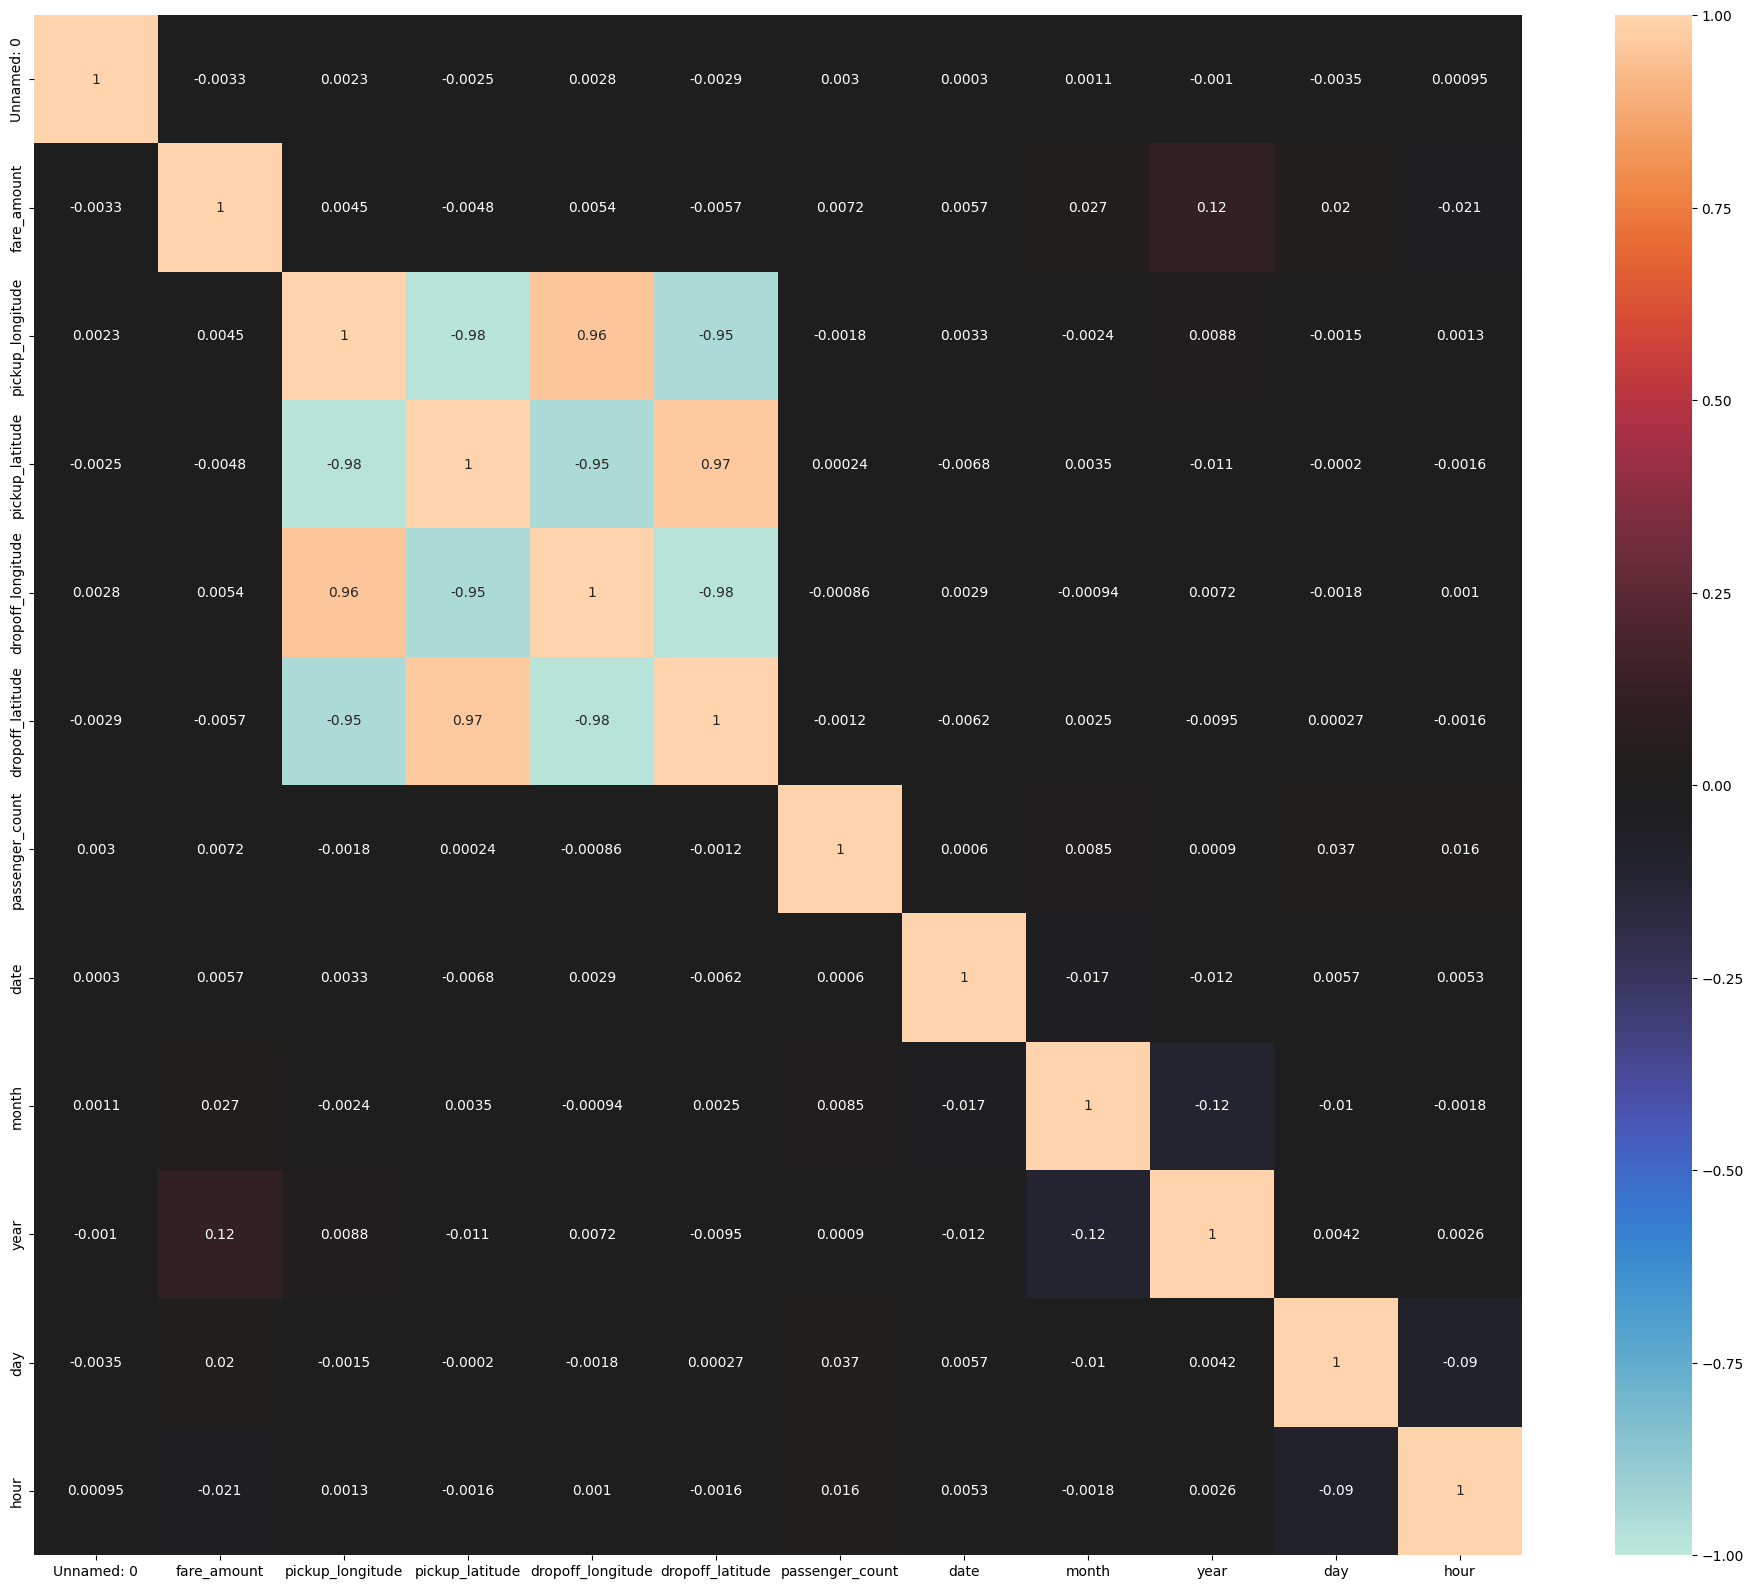

In [20]:
#Checking the correlation
plt.figure(figsize=[24,20])
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()


**Model Evaluation and Insights**

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [22]:
#Finding a r-squared and mean squared erroe(MSE)
linear_reg_model=LinearRegression()
linear_reg_model.fit(x_train,y_train)
y_pred_linear=linear_reg_model.predict(x_test)
def evaluate_model(y_true, y_pred, model_name):
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} R-squared (R2): {r2:.2f}")

print("Linear Regression Model:")
evaluate_model(y_test, y_pred_linear, "Linear Regression")

Linear Regression Model:
Linear Regression RMSE: 3.62
Linear Regression R-squared (R2): 0.02


100%|██████████| 10/10 [00:12<00:00,  1.25s/it]


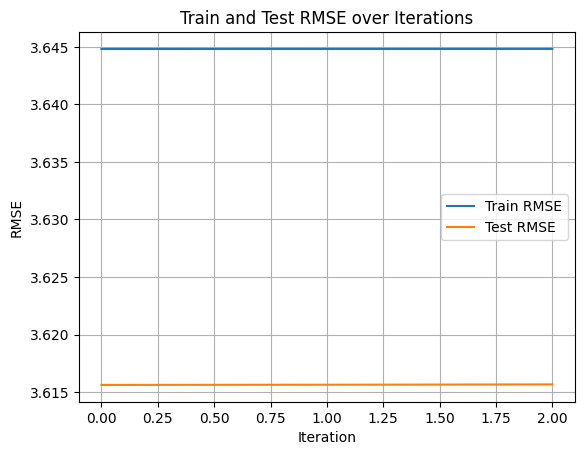

In [23]:
from tqdm import tqdm
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor


train_rmse = []
test_rmse = []
dropped_features = []

for i in tqdm(range(len(Train_X_std.columns) - 1)):
    vif = pd.DataFrame()
    X = Train_X_std.drop(dropped_features, axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    vif.reset_index(drop=True, inplace=True)

    if vif.loc[0]['VIF'] >= 1.1:
        dropped_feature = vif.loc[0]['Features']
        dropped_features.append(dropped_feature)

        LR = LinearRegression()
        LR.fit(Train_X_std.drop(dropped_features, axis=1), y_train)

        pred1 = LR.predict(Train_X_std.drop(dropped_features, axis=1))
        pred2 = LR.predict(Test_X_std.drop(dropped_features, axis=1))

        train_rmse.append(np.sqrt(mean_squared_error(y_train, pred1)))
        test_rmse.append(np.sqrt(mean_squared_error(y_test, pred2)))

# Plotting
plt.plot(train_rmse, label='Train RMSE')
plt.plot(test_rmse, label='Test RMSE')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Train and Test RMSE over Iterations')
plt.grid()
plt.show()
